In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from math import sqrt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor    
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Question 2

# initialise data of lists.
print("Learning and Teaching Approach")
data = {'Approach':['Lecture', 'Practical', 'Independent study', 'Total'], 'Hours per week':[3, 3, 2, 0], 'Total credit hours':[45, 45, 30, 120]}
 
# Create DataFrame
df = pd.DataFrame(data)
 
# Print the output.
print(df)

Learning and Teaching Approach
            Approach  Hours per week  Total credit hours
0            Lecture               3                  45
1          Practical               3                  45
2  Independent study               2                  30
3              Total               0                 120


In [3]:
# Question 3
# In orange

In [4]:
# Question 4

data = pd.read_csv('DataMining1.csv')
data

,Country,Continent,Population in Million
0,A,C1,1.0
1,B,C1,2.0
2,C,C2,3.0
3,D,C2,4.0
4,E,C3,NaN
5,F,C2,0.5
6,G,C1,6.0
7,H,C4,NaN
8,I,NaN,5.0
9,J,C7,1.4


In [5]:
data.isna().sum()

Country                  0
Continent                3
Population in Million    7
dtype: int64

In [6]:
data.dtypes

Country                   object
Continent                 object
Population in Million    float64
dtype: object

In [7]:
# changing a data type for Continent into categorical

data['Continent'] = data['Continent'].astype('category')
data.dtypes

Country                    object
Continent                category
Population in Million     float64
dtype: object

In [8]:
# Preprocessiong the missing value

mean = data['Population in Million'].mean()

data['Population in Million'] = data['Population in Million'].fillna(mean)


mode = data['Continent'].mode()[0]

data['Continent'] = data['Continent'].fillna(mode)

data

,Country,Continent,Population in Million
0,A,C1,1.000000
1,B,C1,2.000000
2,C,C2,3.000000
3,D,C2,4.000000
4,E,C3,25.205263
5,F,C2,0.500000
6,G,C1,6.000000
7,H,C4,25.205263
8,I,C2,5.000000
9,J,C7,1.400000


In [9]:
data.isna().sum()

Country                  0
Continent                0
Population in Million    0
dtype: int64

In [15]:
data.to_csv('Q4.csv')

In [10]:
# Question 5

# Instantiate LabelEncoder, to change brand name into integer datatype

le = LabelEncoder()

data['Country'] = le.fit_transform(data['Country'])

data

,Country,Continent,Population in Million
0,0,C1,1.000000
1,1,C1,2.000000
2,2,C2,3.000000
3,3,C2,4.000000
4,4,C3,25.205263
5,5,C2,0.500000
6,6,C1,6.000000
7,7,C4,25.205263
8,8,C2,5.000000
9,9,C7,1.400000


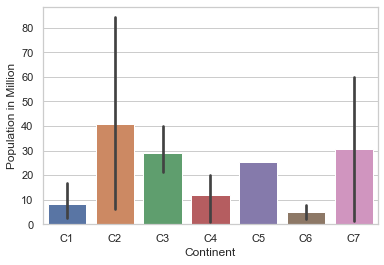

In [11]:
sns.set_theme(style="whitegrid")
sns.barplot(x="Continent", y="Population in Million", data=data)
sns.set({'figure.figsize':(15,8)})

Question 6

In the shared link.

In [16]:
# Question 7


le = LabelEncoder()

data['Continent'] = le.fit_transform(data['Continent'])

data

X = data[ ['Continent', 'Country'] ]             # predictor 

Y = data[ 'Population in Million' ]  # target

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, random_state = 123)

print("Shape of training set: ", x_train.shape)

print("Shape of test set: ", x_test.shape)

Shape of training set:  (20, 2)
Shape of test set:  (6, 2)


In [17]:
knn = KNeighborsRegressor(n_neighbors=2)

knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [18]:
# Predict using the test set 

y_pred = knn.predict(x_test)

y_pred

array([ 17.60263158,  15.60263158,  15.60263158,  15.60263158,
       105.        ,  22.60263158])

In [24]:
# R2 value 
print("Model Performance: ",  knn.score(x_test, y_test))

print ("Root MSE: ", sqrt(mean_squared_error(y_test, y_pred)) )


Model Performance:  -1.9548647506170278
Root MSE:  27.353838156853918


Question 8

Druk Green Corporation, Bhutan Computer Incidence Response Team, Druk Holding and Investment Ltd and DHI are some of the company that works related to this module.

In [21]:
# Question 9
# In orange


Question 10 

In the shared link. 